**[Link to the Data Set on Kaggle](https://www.kaggle.com/mirichoi0218/insurance)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
plt.style.use('seaborn')
%matplotlib inline

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The half of the clients are younger than 39 and having 1 child and bmi less than 30 with the charges less than 9382.03 $, according to BMI, the other half of clients are obese.

Mean charges are 13270.42 $.

In [4]:
insurance.notnull().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

There are no missing values in this dataset.

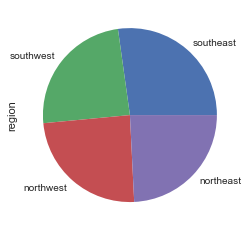

In [5]:
insurance.region.value_counts(normalize=True).plot(kind='pie')

Each region is almost eqaully represented in the dataset.

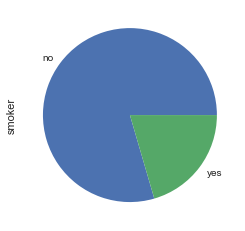

In [6]:
insurance.smoker.value_counts(normalize=True).plot(kind='pie')

There are almost 80% of non-smokers in the dataset. In that case, the dataset is imbalanced.

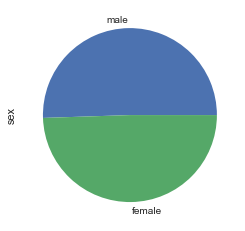

In [7]:
insurance.sex.value_counts(normalize=True).plot(kind='pie')

There are a little bit more men than women.

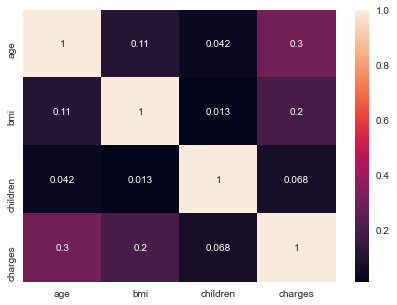

In [8]:
plt.figure(figsize=(7,5))
sns.heatmap(insurance.corr(), annot=True)

Let's divide our client into four groups: Youngsters (between 19 and 30 years), Adults (31-45), Older (46-60), Seniors (older than 60)

In [9]:
young = insurance.loc[insurance.age <=30].age.count()
middle_age=insurance.loc[(insurance.age > 30)&(insurance.age <= 45)].age.count()
old=insurance.loc[(insurance.age > 45)&(insurance.age <= 60)].age.count()
senior=insurance.loc[insurance.age > 60].age.count()

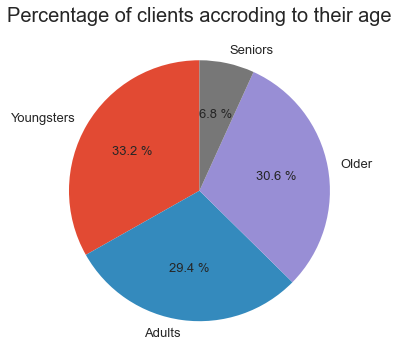

In [97]:
categories = [young, middle_age, old, senior]
labels=['Youngsters','Adults','Older','Seniors']

with plt.style.context('ggplot'):
    plt.figure(figsize=(8,6))
    plt.pie(categories, labels=labels, autopct='%.1f %%', startangle=90, textprops={'fontsize': 13})
    plt.title('Percentage of clients accroding to their age', fontsize=20)
    plt.show()

3 of 4 groups are represented almost equally except of the oldest group.

In [11]:
def set_a_category(age):
    quality_cat = []
    for client in range(insurance.age.count()):
        if insurance.age[client] <=30:
            quality_cat.append('Youngsters')
        elif (insurance.age[client] > 30)&(insurance.age[client] <= 45):
            quality_cat.append('Adults')
        elif (insurance.age[client] > 45)&(insurance.age[client] <= 60):
            quality_cat.append('Older')      
        else:
            quality_cat.append('Seniors')

    return quality_cat

In [12]:
insurance['age_category']=set_a_category(insurance.age)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_category
0,19,female,27.900,0,yes,southwest,16884.92400,Youngsters
1,18,male,33.770,1,no,southeast,1725.55230,Youngsters
2,28,male,33.000,3,no,southeast,4449.46200,Youngsters
3,33,male,22.705,0,no,northwest,21984.47061,Adults
4,32,male,28.880,0,no,northwest,3866.85520,Adults


In [13]:
# Create a categorical datatype for this group in order to make pandas clear that here is an order.
from pandas.api.types import CategoricalDtype

categories = ['Youngsters', 'Adults', 'Older', 'Seniors']

quality_cat = CategoricalDtype(categories, ordered=True)

insurance['age_category'] = insurance.age_category.astype(quality_cat)

In [14]:
insurance.groupby(insurance.age_category).agg(['mean','std','min','max'])

age                          bmi                           \
                   mean       std min max       mean       std     min    max   
age_category                                                                    
Youngsters    22.961712  3.988796  18  30  29.890766  6.247665  15.960  53.13   
Adults        38.098985  4.382227  31  45  30.442170  5.937276  16.815  47.60   
Older         52.731051  4.272695  46  60  31.319572  6.051134  18.050  49.06   
Seniors       62.483516  1.119153  61  64  32.441813  5.663759  21.090  44.00   

              children                         charges                \
                  mean       std min max          mean           std   
age_category                                                           
Youngsters    0.840090  1.153703   0   5   9397.552051  11547.927481   
Adults        1.451777  1.199643   0   5  12647.455654  11998.757295   
Older         1.124694  1.199102   0   5  16340.993846  11238.230589   
Seniors       0.659341  1.077237   0   4  21063.163398  11875.956595   

                                       
                     min          max  
age_category                           
Youngsters     1121.8739  51194.55914  
Adults         3260.1990  62592.87309  
Older          7147.1050  63770.42801  
Seniors       12557.6053  49577.66240

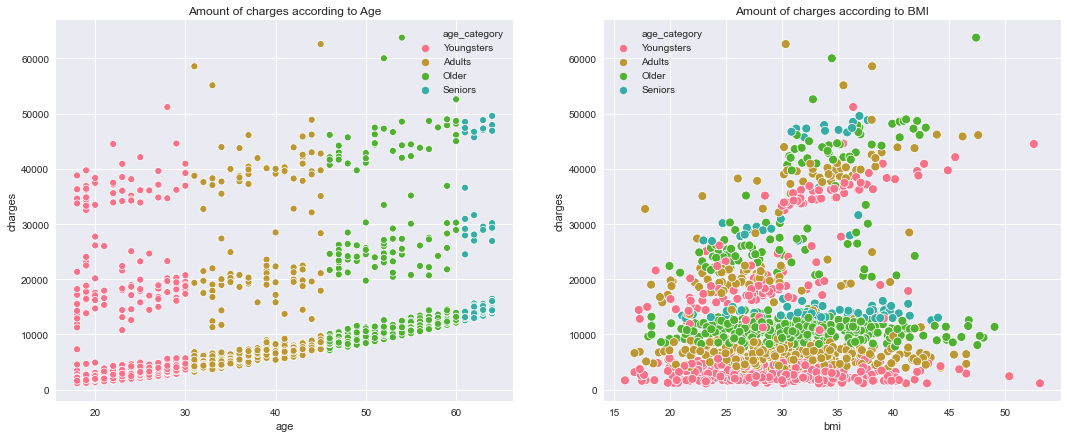

In [15]:
fig = plt.figure(figsize=(18,7))

with sns.color_palette("husl"):
    ax = fig.add_subplot(1,2,1)
    sns.scatterplot(x='age', y='charges', hue='age_category', data=insurance).set_title("Amount of charges according to Age")
    ax = fig.add_subplot(1,2,2)
    sns.scatterplot(x='bmi', y='charges', hue='age_category', data=insurance, s=80).set_title("Amount of charges according to BMI")

We can make a few conclusions:
- The older a person is and the higher BMI a person has, charges are increasing slightly.
- There might be another more valuable reason for higher charges, e.g. smoking or amount of children in the family

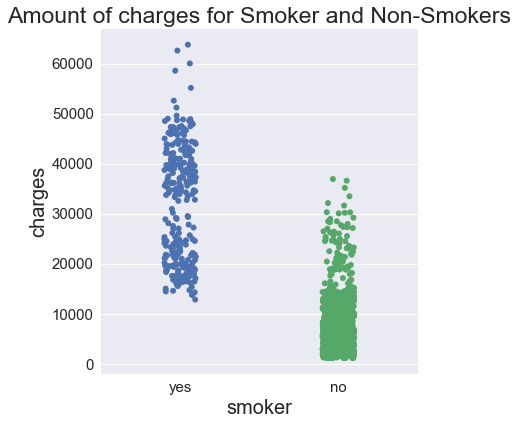

In [16]:
with plt.style.context('seaborn'):
    sns.set_context(rc={"font.size":20,"axes.titlesize":23,"axes.labelsize":20, "xtick.labelsize":15, "ytick.labelsize":15})
    sns.catplot(x='smoker', y='charges', data=insurance, height=6, s=6)
    plt.title('Amount of charges for Smoker and Non-Smokers')

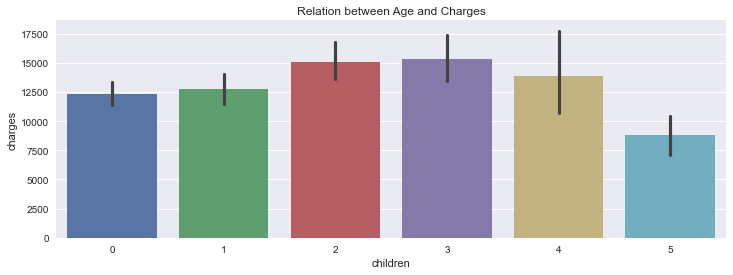

In [30]:
plt.figure(figsize=(12,4))
plt.title('Relation between Age and Charges')
sns.barplot(x='children', y='charges', data=insurance)

As we could see, smokers are paying monthly way much. On average persons with 2 and 3 children have the highest monthly charges.

## Looking for correlation between sex and charges

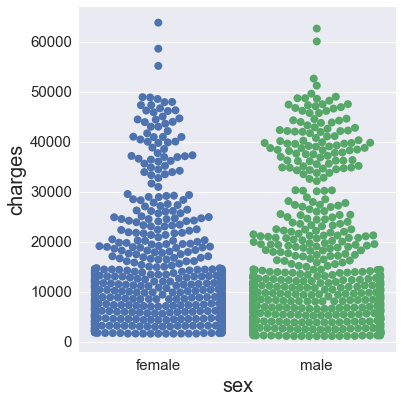

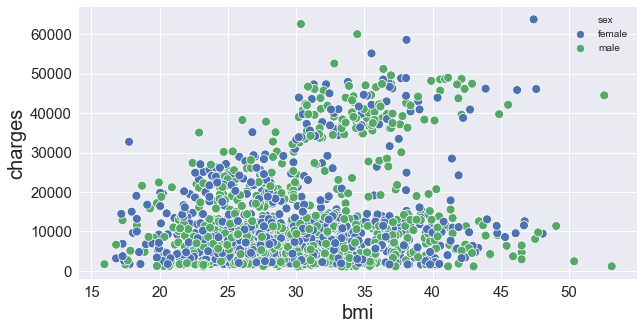

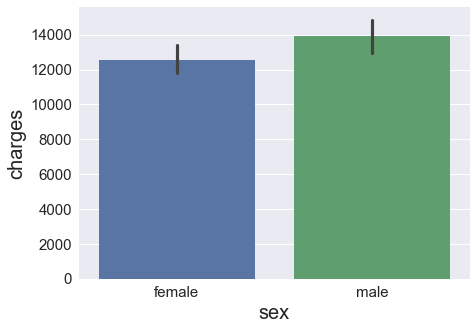

In [31]:
sns.set_context(rc={"font.size":20,"axes.titlesize":23,"axes.labelsize":20, "xtick.labelsize":15, "ytick.labelsize":15})
sns.catplot(x='sex', y='charges', data=insurance, kind='swarm',height=6, s=8)
plt.show()
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y='charges', hue='sex', data=insurance, s=80)
plt.show()
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='charges', data=insurance)
plt.show()

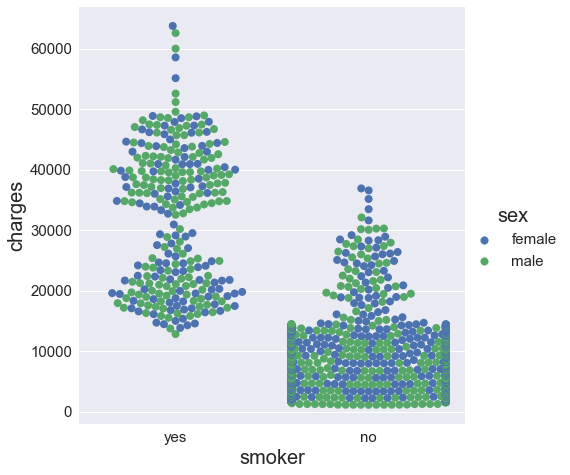

In [32]:
sns.set_context(rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":20,
                    "xtick.labelsize":15, "ytick.labelsize":15, "legend.fontsize":15})
sns.catplot(x='smoker', y='charges', data=insurance, kind='swarm', hue='sex', height=7, s=8)

Men pay slightly higher charges than women. The only reason could be, that there are more smokers among men.

## Looking for correlation between BMI and charges

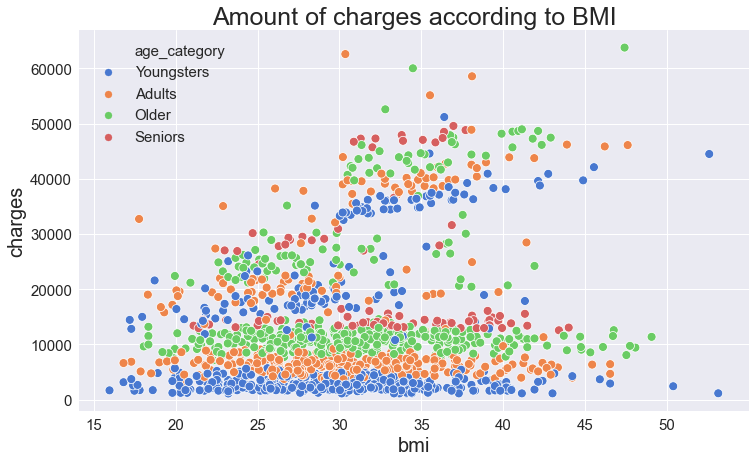

In [33]:
plt.figure(figsize=(12,7))
with sns.color_palette("muted"):
    sns.scatterplot(x='bmi', y='charges', hue='age_category', data=insurance, s=80).set_title("Amount of charges according to BMI")

Text(0.5, 1.0, 'Amount of charges according to BMI and number of children')

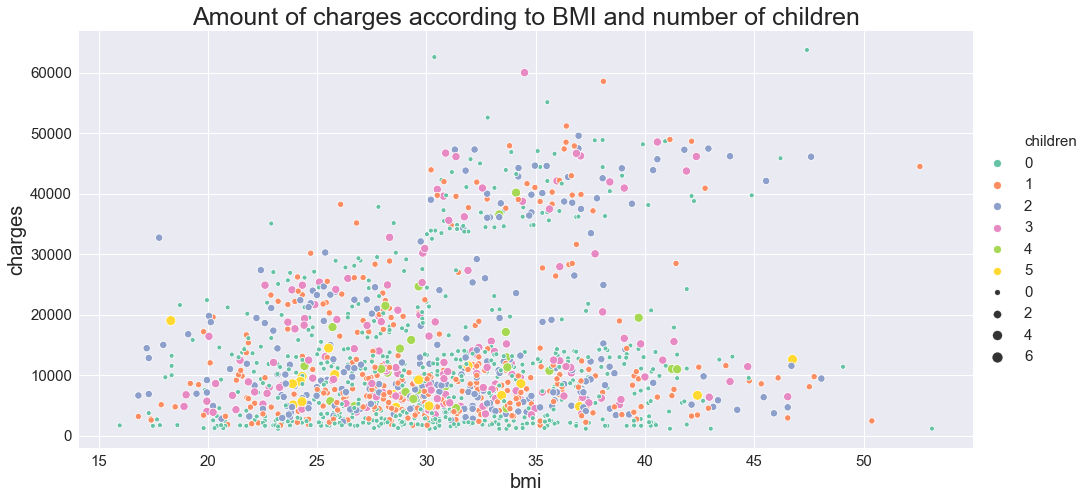

In [34]:
sns.relplot(x='bmi', y='charges', hue='children',size='children', palette="Set2", data=insurance, height=7, aspect=2)
plt.title("Amount of charges according to BMI and number of children")

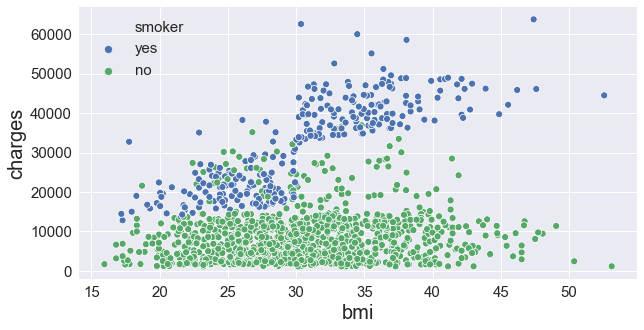

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance)

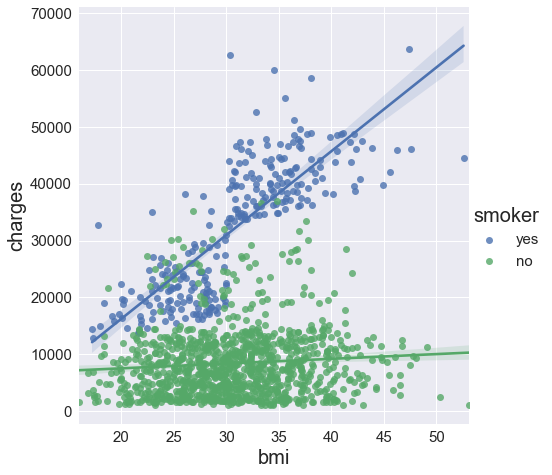

In [36]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance, height=7)

There are no clear dependencies between age and bmi and joint influence on charges. The same situation is to observe with bmi and amount of children on family, i.e. older person does not always has weight problem and more children do not make person fitter or vice versa.
**But**, if the person a smoker and the BMI is more than 30, it could be a sign for much higher monthly charges than for a non-smoker with the same BMI (in compare to a smoker with the BMI lower than 30 and non-smoker with the respectively BMI.)

![BMI](https://us.123rf.com/450wm/happyvector071/happyvector0711811/happyvector071181100018/111635730-creative-vector-illustration-of-bmi-body-mass-index-infographic-chart-with-silhouettes-and-scale-iso.jpg?ver=6)

In [37]:
underweight = insurance.loc[insurance.bmi < 18.5].bmi.count()
normal = insurance.loc[(insurance.bmi >= 18.5) & (insurance.bmi < 24.9)].bmi.count()
overweight = insurance.loc[(insurance.bmi >= 25) & (insurance.bmi < 29.9)].bmi.count()
obese = insurance.loc[(insurance.bmi >= 30) & (insurance.bmi < 34.9)].bmi.count()
extremly_obese = insurance.loc[insurance.bmi >= 35].bmi.count()

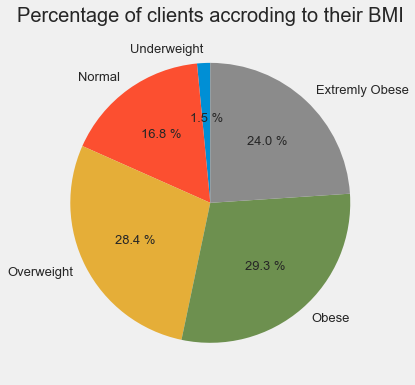

In [38]:
categories = [underweight, normal, overweight, obese, extremly_obese]
labels=['Underweight','Normal','Overweight','Obese', 'Extremly Obese']

with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,6))
    plt.pie(categories, labels=labels, autopct='%.1f %%', startangle=90, textprops={'fontsize': 13})
    plt.title('Percentage of clients accroding to their BMI', fontsize=20)
    plt.show()

As we can see, more than 80% of the clients are having higher or lower overweight problems (28.4+29.3+24.0), which could be probably a reason for higher charges.

### Let's imagine we would like to build an aproximate charges calculator for our future clients using the data of our present clients.

In order to do so we could build a few ML models and test them and based of the best model knowing parameters like: sex, age, bmi, number of children in the family we could make pedictions for the average monthly charges. Profiles of these persons will be below (line 120+). After the training and testing phase of each model we will make a prediction for 'fakes persons' in order to understand how high or low their charges could be if someone similliar comes to the insurance company.

In [39]:
#We should prepare our data to be viable for analysing with ML models
dummies = pd.get_dummies(insurance[['sex','smoker','region']],drop_first=True)
dummy_insurance = pd.concat([insurance,dummies],axis=1)
dummy_insurance.drop(['sex','smoker', 'region','charges','age_category'],axis=1).head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [40]:
#creating features
X = dummy_insurance.drop(['sex','smoker', 'region','charges', 'age_category'],axis=1)
print(X.shape)

(1338, 8)


In [44]:
#creating target variable
y = insurance.charges
print(y.shape)

(1338,)


In [45]:
#splitting data on training and test set in order to achieve better model results on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=148)

In [46]:
print('X-train shape is: ', X_train.shape)
print('y-train shape is: ', y_train.shape)
print('X-test shape is: ', X_test.shape)
print('y-test shape is: ', y_test.shape)

X-train shape is:  (1003, 8)
y-train shape is:  (1003,)
X-test shape is:  (335, 8)
y-test shape is:  (335,)


In [54]:
# import important metrics to evaluate the models
from sklearn.metrics import mean_squared_error,explained_variance_score,r2_score

#and create a function to avoid some repetition
def report_scores(y_pred=0):
    print("The value of Rooted Mean Square Error is {:.2f} (dollars)".format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print("The model explains {:.2f} % of the variance according to Explained Variance Score".format(explained_variance_score(y_test,y_pred)*100))
    print("The model explains {:.2f} % of the variance according to R-squared Score".format(r2_score(y_test,y_pred)*100))

In [48]:
# let's make some exeplars of fake persons, that have some Besonderheiten, to make late predictions on it
{col:0 for col in X.columns}

{'age': 0,
 'bmi': 0,
 'children': 0,
 'sex_male': 0,
 'smoker_yes': 0,
 'region_northwest': 0,
 'region_southeast': 0,
 'region_southwest': 0}

### Profiles of created persons

In [49]:
fake_person= {'age': 25,
 'bmi': 26.1,
 'children': 2,
 'sex_male': 0,
 'smoker_yes': 0,
 'region_northwest': 0,
 'region_southeast': 1,
 'region_southwest': 0}

fake_person2= {'age': 48,
 'bmi': 29.2,
 'children': 1,
 'sex_male': 1,
 'smoker_yes': 1,
 'region_northwest': 0,
 'region_southeast': 0,
 'region_southwest': 0}

fake_person3= {'age': 60,
 'bmi': 30,
 'children': 4,
 'sex_male': 0,
 'smoker_yes': 1,
 'region_northwest': 1,
 'region_southeast': 0,
 'region_southwest': 0}

fake_person4= {'age': 33,
 'bmi': 35,
 'children': 0,
 'sex_male': 1,
 'smoker_yes': 0,
 'region_northwest': 0,
 'region_southeast': 0,
 'region_southwest': 1}

In [50]:
fakes=pd.DataFrame(data=[fake_person,fake_person2,fake_person3,fake_person4])
fakes

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,25,26.1,2,0,0,0,1,0
1,48,29.2,1,1,1,0,0,0
2,60,30.0,4,0,1,1,0,0
3,33,35.0,0,1,0,0,0,1


## Testing Linear Regression Model

In [55]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate it
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [56]:
# let's make a prediction on a test set
y_pred_lin = linreg.predict(X_test)

In [57]:
## computing square root of the mean squared error (MSE) to get better intepretation
report_scores(y_pred=y_pred_lin)

The value of Rooted Mean Square Error is 6248.52 (dollars)
The model explains 73.50 % of the variance according to Explained Variance Score
The model explains 73.48 % of the variance according to R-squared Score


In [58]:
print(linreg.intercept_)
print(linreg.coef_)

-12311.611779165461
[  253.72956656   359.30316347   533.16646701  -454.76116687
 23503.40470438  -426.32307424  -895.51257274 -1012.36903903]


In [59]:
# pair the feature names with the coefficients
coeffs_lr=list(zip(X.columns, linreg.coef_))
list(zip(X.columns, linreg.coef_))

[('age', 253.72956655863553),
 ('bmi', 359.30316347355233),
 ('children', 533.1664670079901),
 ('sex_male', -454.76116686526944),
 ('smoker_yes', 23503.40470437861),
 ('region_northwest', -426.3230742357927),
 ('region_southeast', -895.5125727408149),
 ('region_southwest', -1012.3690390309127)]

In [63]:
#Let's see what makes the biggest influence on the amount of charges
mes_lr=pd.DataFrame(coeffs_lr, columns=['Coefficients', 'Margin. Effects'])
mes_lr.sort_values('Margin. Effects', ascending=False)

,Coefficients,Margin. Effects
4,smoker_yes,23503.404704
2,children,533.166467
1,bmi,359.303163
0,age,253.729567
5,region_northwest,-426.323074
3,sex_male,-454.761167
6,region_southeast,-895.512573
7,region_southwest,-1012.369039


As we have expected, the highest influence on monthly charges has wheter the person smoker or not. Unfortunately, if the peson is male, the monthly charges tend to be lower, which seems to be an error. Other coefficients seem to have expected influence.

In [72]:
# counting approximate amount of charges for 'fake persons', that we have created above
y_fpredlr = linreg.predict(fakes)
y_fpredlr

array([ 3580.26031274, 33940.8697936 , 38901.00461673,  7169.94443295])

## Adding some polynomial feautres to the linear model

In [65]:
#importing necessary method
from sklearn.preprocessing import PolynomialFeatures

# Creating the polynomial features and regressor
poly_features = PolynomialFeatures(degree = 3)
X_poly = poly_features.fit_transform(X)
X_train_poly = poly_features.fit_transform(X_train)
poly_features.fit(X_train_poly, y_train)

poly3_reg = LinearRegression()
poly3_reg.fit(X_train_poly, y_train)

LinearRegression()

In [66]:
# transforming testing set following the same path as we did with the training set
X_poly_test = poly_features.fit_transform(X_test)
y_poly_pred = poly3_reg.predict(X_poly_test)

In [67]:
report_scores(y_pred=y_poly_pred)

The value of Rooted Mean Square Error is 5455.29 (dollars)
The model explains 79.86 % of the variance according to Explained Variance Score
The model explains 79.79 % of the variance according to R-squared Score


In [68]:
# counting approximate amount of charges for 'fake persons'
fakes_poly = poly_features.fit_transform(fakes)
y_fpredpl=poly3_reg.predict(fakes_poly)
y_fpredpl

array([ 4841.1314981 , 32930.27363999, 44865.15761571,  5657.14355148])

## Testing DecisionTree Model

In [69]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [70]:
y_pred_dtr = dtr.predict(X_test)

In [71]:
report_scores(y_pred=y_pred_dtr)

The value of Rooted Mean Square Error is 4921.88 (dollars)
The model explains 83.70 % of the variance according to Explained Variance Score
The model explains 83.55 % of the variance according to R-squared Score


In [74]:
# counting approximate amount of charges for 'fake persons'
y_fpreddt=dtr.predict(fakes)
y_fpreddt

array([ 6629.2679995 , 26737.65876381, 26737.65876381, 12986.92092   ])

## XGBoost part

In [75]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=148)

xgb_reg.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=148)

In [76]:
y_pred_xgb = xgb_reg.predict(X_test)

In [77]:
report_scores(y_pred=y_pred_xgb)

The value of Rooted Mean Square Error is 4842.15 (dollars)
The model explains 84.16 % of the variance according to Explained Variance Score
The model explains 84.07 % of the variance according to R-squared Score


In [79]:
# counting approximate amount of charges for 'fake persons'
y_fpredgb=xgb_reg.predict(fakes)
y_fpredgb

array([ 7531.414, 26186.512, 34505.902,  4511.106], dtype=float32)

## Keras Part

In [80]:
# importing necessary dependencies
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [81]:
y_tr = np.array(y_train)
y_te = np.array(y_test)

#Scaling all data
scaler_X = StandardScaler().fit(X_train)
scaler_Y = StandardScaler().fit(y_tr.reshape(-1,1))

X_tr = scaler_X.transform(X_train)
X_te = scaler_X.transform(X_test)
y_tr = scaler_Y.transform(y_tr.reshape(-1,1))
y_te = scaler_Y.transform(y_te.reshape(-1,1))

print("X-training set has a shape of: ", X_tr.shape)
print("X-testing set has a shape of: ", X_te.shape)
print("y-training vector has a shape of: ", y_tr.shape)
print("y-testing vector has a shape of: ", y_te.shape)

X-training set has a shape of:  (1003, 8)
X-testing set has a shape of:  (335, 8)
y-training vector has a shape of:  (1003, 1)
y-testing vector has a shape of:  (335, 1)


In [82]:
def build_model():
    model = Sequential([Dense(8, input_shape=(X_tr.shape[1],), activation='relu'),
                        Dense(32, activation='relu'),
                        Dense(1)])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    
    return model

In [83]:
model=build_model()

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [85]:
# saving a model into a variable in order to make plots and access the results
history1 = model.fit(X_tr, y_tr, epochs=100, verbose=0)

Text(0, 0.5, 'Value of MAE Metric')

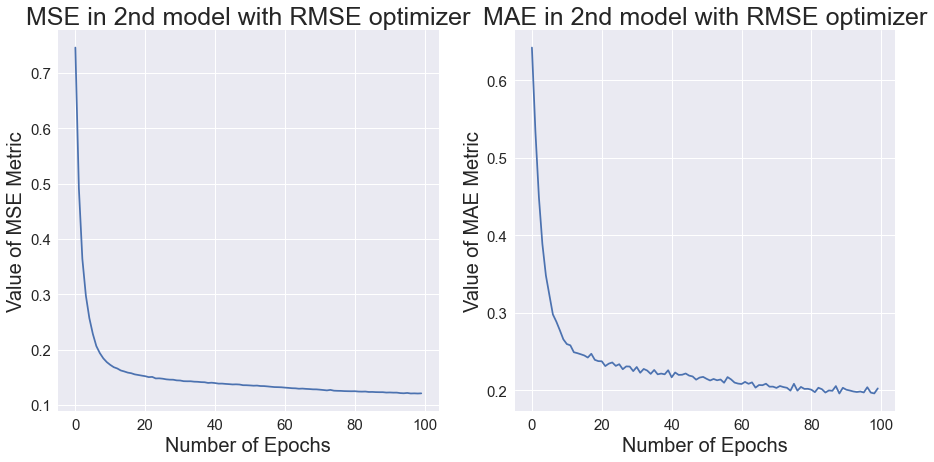

In [86]:
fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot(1,2,1)
ax.plot(history1.history['loss'])
ax.set_title('MSE in 2nd model with RMSE optimizer')
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Value of MSE Metric')

ax = fig.add_subplot(1,2,2)
ax.plot(history1.history['mae'])
ax.set_title('MAE in 2nd model with RMSE optimizer')
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Value of MAE Metric')

In [87]:
y_pr = model.predict(X_te)
score = model.evaluate(X_te, y_te)
print(score)

335/335 [==============================] - 0s 122us/step
[0.17129874976713266, 0.22150424122810364, 0.17129874229431152]


In [88]:
y_prediction = scaler_Y.inverse_transform(y_pr)
y_prediction[:10]

array([[ 8311.424 ],
       [47960.105 ],
       [ 1348.2499],
       [ 3676.4343],
       [ 6834.812 ],
       [12456.014 ],
       [13450.933 ],
       [ 8666.1045],
       [ 7692.9653],
       [10406.743 ]], dtype=float32)

In [89]:
report_scores(y_pred=y_prediction)

The value of Rooted Mean Square Error is 5005.96 (dollars)
The model explains 83.22 % of the variance according to Explained Variance Score
The model explains 82.98 % of the variance according to R-squared Score


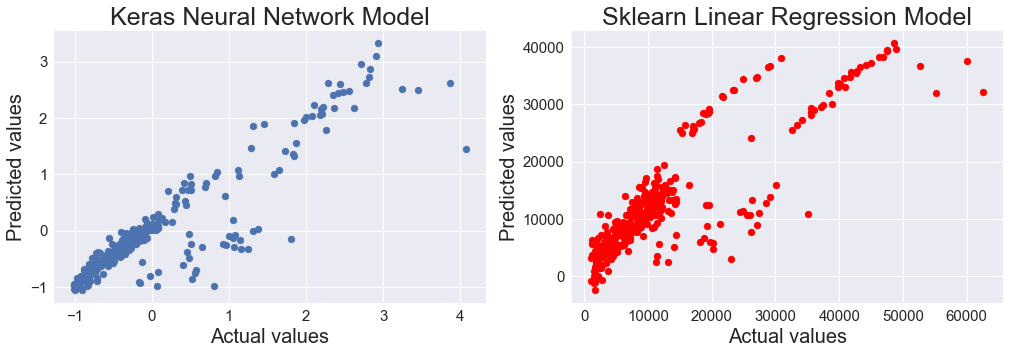

In [90]:
plt.figure(figsize=(17,5))

plt.subplot(121)
plt.scatter(y_te, y_pr)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Keras Neural Network Model")

plt.subplot(122)
plt.scatter(y_test, y_pred_lin, color='red')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Sklearn Linear Regression Model")
plt.show()

#### Doing all necessary transformation to make computations for our fake persons possible

In [91]:
#transforming into array
fake_peeps=np.array(fakes)
fake_peeps.shape

(4, 8)

In [92]:
#scaling the data
fake_peeps = scaler_X.transform(fake_peeps)
fake_peeps

array([[-1.00230316, -0.72245782,  0.79018124, -1.02116103, -0.52079689,
        -0.56852352,  1.67309367, -0.5593096 ],
       [ 0.62670428, -0.21273273, -0.05385687,  0.97927748,  1.92013434,
        -0.56852352, -0.59769517, -0.5593096 ],
       [ 1.4766212 , -0.08119077,  2.47825746, -1.02116103,  1.92013434,
         1.75894217, -0.59769517, -0.5593096 ],
       [-0.43569188,  0.74094648, -0.89789498,  0.97927748, -0.52079689,
        -0.56852352, -0.59769517,  1.78791854]])

In [93]:
#making predictions
fake_preds = model.predict(fake_peeps)
fake_preds

array([[-0.72029793],
       [ 1.5370553 ],
       [ 2.2611856 ],
       [-0.8421205 ]], dtype=float32)

In [94]:
#inverting the scaling to make predictions interpretable
fake_preds = scaler_Y.inverse_transform(fake_preds)
fake_preds

array([[ 4635.3604],
       [31938.338 ],
       [40696.79  ],
       [ 3161.9001]], dtype=float32)

#### We can fill out table with our predictions to compare the results of each model

In [95]:
fakes['LinReg_Predictions'] = y_fpredlr
fakes['PolynomialReg_Predictions'] = y_fpredpl
fakes['DecisionTree_Predictions'] = y_fpreddt
fakes['XGBoost_Predictions'] = y_fpredgb
fakes['Keras_Predictions'] = fake_preds

In [96]:
fakes

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,LinReg_Predictions,PolynomialReg_Predictions,DecisionTree_Predictions,XGBoost_Predictions,Keras_Predictions
0,25,26.1,2,0,0,0,1,0,3580.260313,4841.131498,6629.268000,7531.414062,4635.360352
1,48,29.2,1,1,1,0,0,0,33940.869794,32930.273640,26737.658764,26186.511719,31938.337891
2,60,30.0,4,0,1,1,0,0,38901.004617,44865.157616,26737.658764,34505.902344,40696.789062
3,33,35.0,0,1,0,0,0,1,7169.944433,5657.143551,12986.920920,4511.105957,3161.900146


## Conclusions

- We could delete variable region, as it looks like it has not so much impact on charges. It's viable to make a few test to be sure (maybe label encoding => scatter plot => correlation => heatmap)
- We could drop age and doing all manipulations with the data according to the created age_category as well.
- Scores of the models are not even nearly perfect, so there are a lot of potential to tune the parameters, e.g. Decision Tree's or Neural Network's parameters or playing with polynomial degree in Polynomial Regression, but trying to avoid overfitting.
- It is also possible to make a validation set from training set in order to achieve better results of our models, but the data set is not to big, what makes the idea less viable.
- There is an opportunity to make another train/test split proportion